In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
filename = 'data/VC-HABITAT.csv'
afp_name = filename.split('-')[1].split('.')[0]
afp = pd.read_csv(filename, index_col=0, parse_dates=True)
afp.dropna(inplace=True)

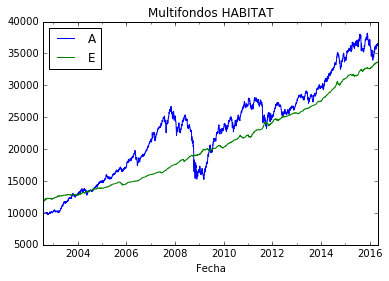

In [3]:
afp.loc[:,['A','E']].plot(title='Multifondos %s'%(afp_name))

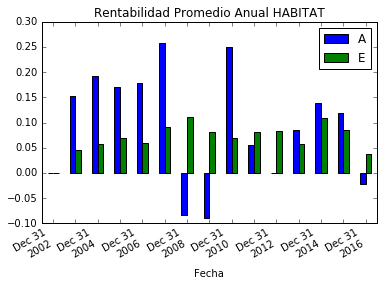

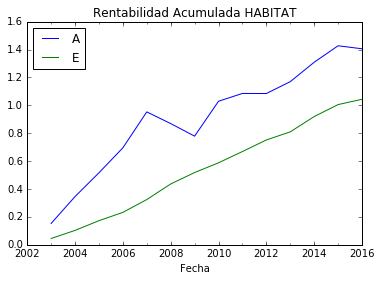

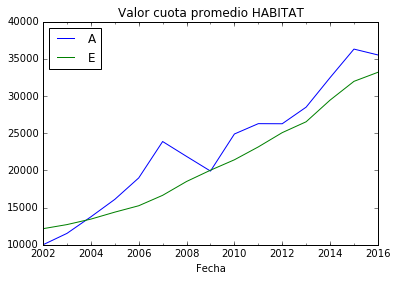

In [4]:
# Grafico rentabilidad, rentabilidad acumulada y valor cuota promedio periodo
# Periodos : W week, , M month, Q quarter, A year
period = 'A'
# Promedio del periodo
df = afp.loc[:,['A','E']].resample(period).mean()
# Grafo rentabilidad
aux = df.pct_change(1)
ax = aux.plot(title='Rentabilidad Promedio Anual %s'%(afp_name), kind='bar')
# Fix date format on bar plot with pandas
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(df.index)
show = 6; step = int(len(df.index)/show)
# Every step ticklable shows the month, day and year
ticklabels[::step] = [item.strftime('%b %d\n%Y') for item in aux.index[::step]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
# Grafo rentabilidad acumulada
df.pct_change(1).cumsum().plot(title='Rentabilidad Acumulada %s'%(afp_name))
# Grafo valor cuota promedio
df.plot(title='Valor cuota promedio %s'%(afp_name))

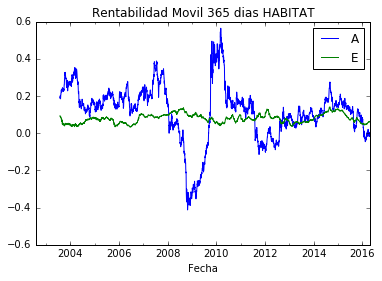

In [5]:
afp.loc[:,['A','E']].pct_change(365).plot(title='Rentabilidad Movil 365 dias %s'%(afp_name))

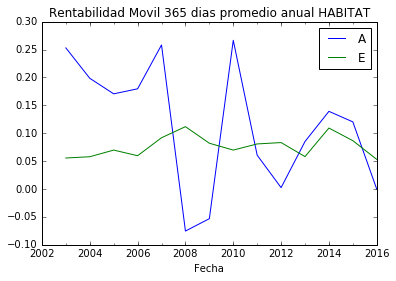

In [6]:
afp.loc[:,['A','E']].pct_change(365).resample('A').mean().plot(
        title='Rentabilidad Movil 365 dias promedio anual %s'%(afp_name))

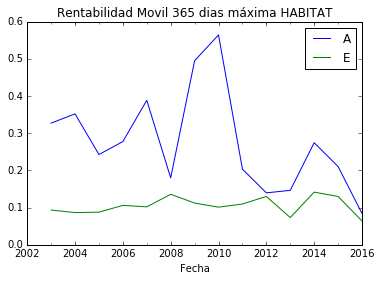

In [7]:
afp.loc[:,['A','E']].pct_change(365).resample('A').max().plot(
        title=u'Rentabilidad Movil 365 dias máxima %s'%(afp_name))

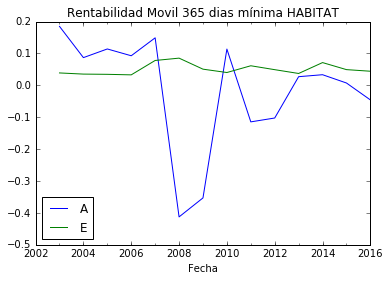

In [8]:
afp.loc[:,['A','E']].pct_change(365).resample('A').min().plot(
        title=u'Rentabilidad Movil 365 dias mínima %s'%(afp_name))

In [9]:
#%qtconsole